In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset :

Dua, D. and Graff, C. UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
#Convert g and h to 1 and 0
df['class'] = (df['class'] == "g").astype(int)
df.sample(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3328,35.0856,17.7549,2.9217,0.3174,0.1707,5.7032,22.9087,10.1315,19.8801,169.2810,1
1581,97.0232,27.7519,3.2253,0.2690,0.1961,-18.1672,58.1563,-16.9043,2.8669,343.4730,1
17056,31.3556,14.3849,2.4757,0.4127,0.2813,19.7560,34.1142,-6.2821,4.5864,211.9991,0
6336,26.6016,0.0000,2.2188,0.7915,0.4320,-27.8246,-13.8735,-0.0001,15.9200,189.4410,1
9401,50.9098,21.7903,3.4760,0.2069,0.1051,-9.7378,30.1218,14.1587,7.0487,199.5640,1


In [4]:
"""
Nominal data : No inherent order
Ordinal data : Inherent order is present
"""
#df.isna().sum()
for label in cols[:-1]:
    print(f"Distribution for {label} (gamma):")
    print(df[df["class"]==1][label].value_counts())
    print(f"Distribution for {label} (hadron):")
    print(df[df["class"]==0][label].value_counts())

Distribution for fLength (gamma):
fLength
24.8332    3
23.7968    2
20.8971    2
18.6330    2
12.6594    2
          ..
35.3166    1
21.8166    1
20.4629    1
13.0845    1
31.5125    1
Name: count, Length: 12200, dtype: int64
Distribution for fLength (hadron):
fLength
20.4949     2
98.3474     2
33.2724     2
18.4343     2
17.5993     2
           ..
75.9957     1
80.5522     1
33.9769     1
36.7909     1
187.1814    1
Name: count, Length: 6552, dtype: int64
Distribution for fWidth (gamma):
fWidth
0.0000     78
0.0001      3
0.0029      3
0.0028      3
11.9517     3
           ..
16.3463     1
28.1852     1
20.0900     1
11.1771     1
19.2867     1
Name: count, Length: 11907, dtype: int64
Distribution for fWidth (hadron):
fWidth
0.0000     20
10.0342     3
11.5750     2
41.8692     2
17.8717     2
           ..
9.5171      1
45.6138     1
59.7657     1
15.4061     1
53.0014     1
Name: count, Length: 6509, dtype: int64
Distribution for fSize (gamma):
fSize
2.1508    26
2.1319    23
2.1

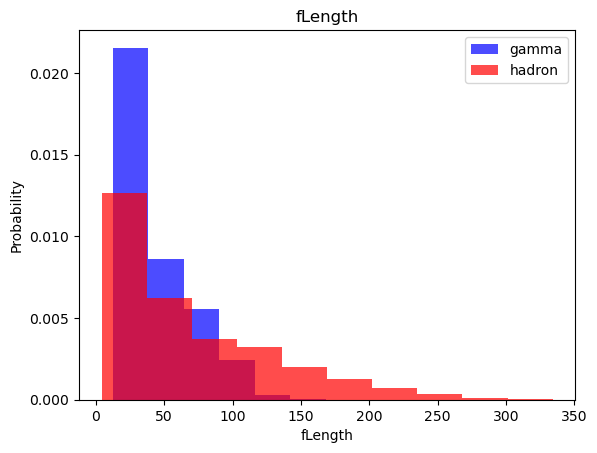

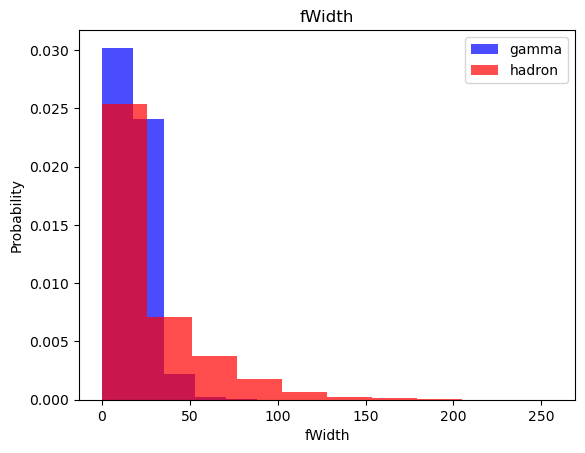

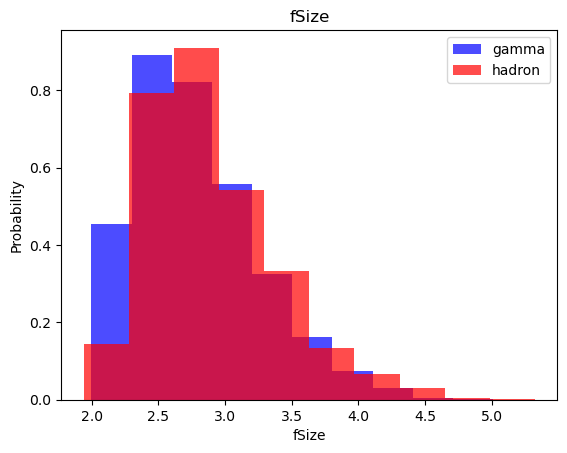

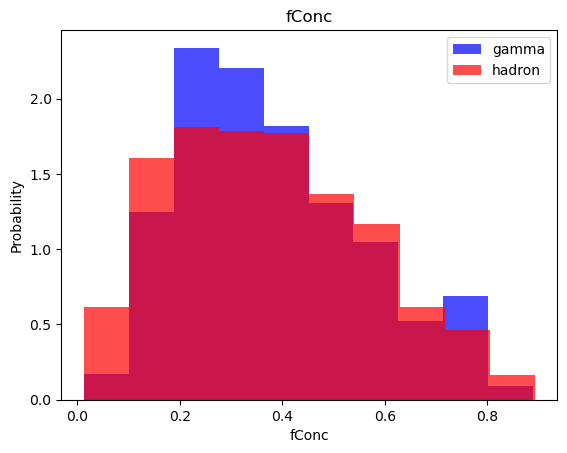

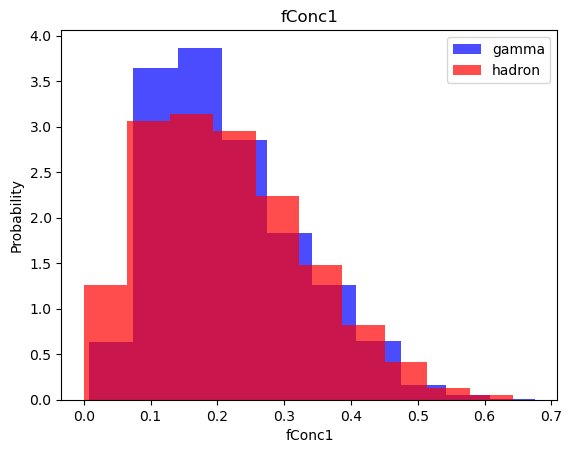

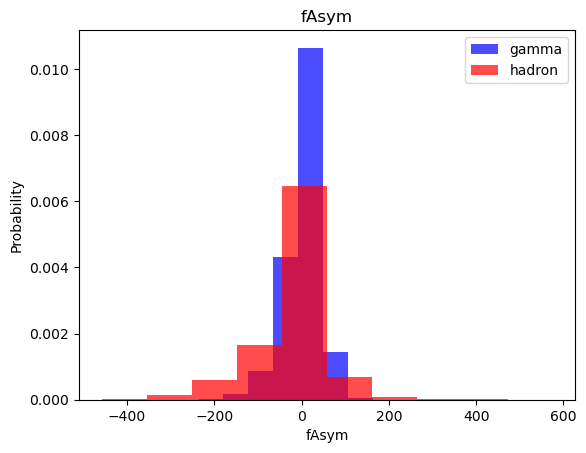

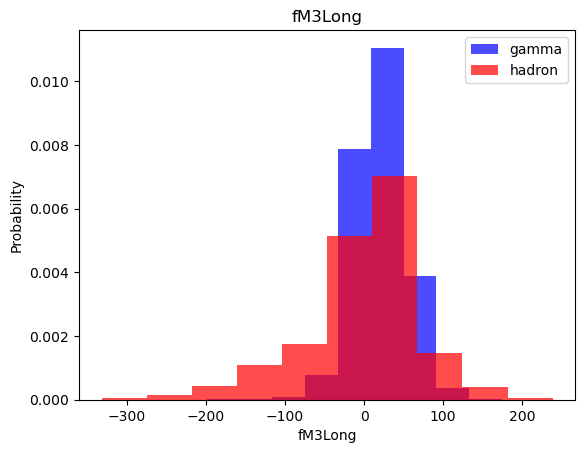

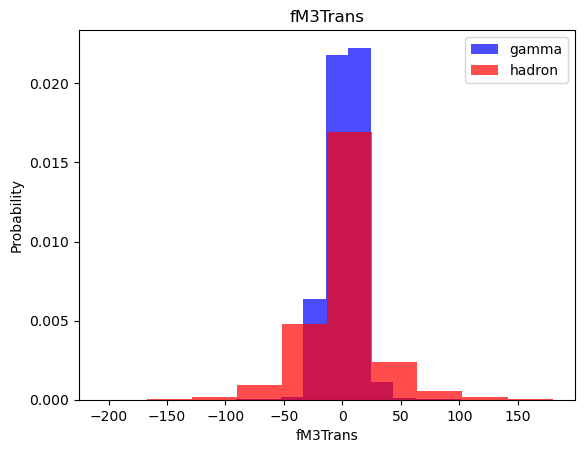

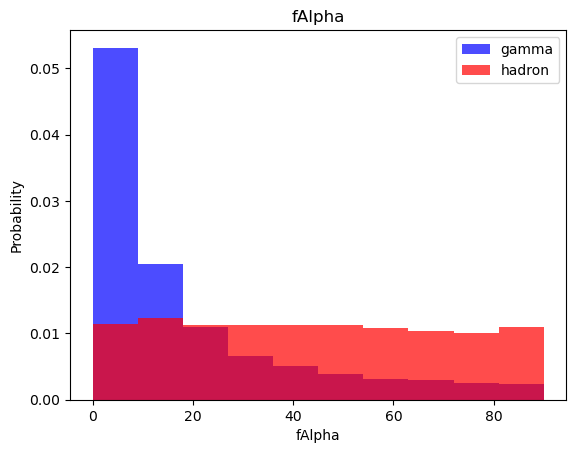

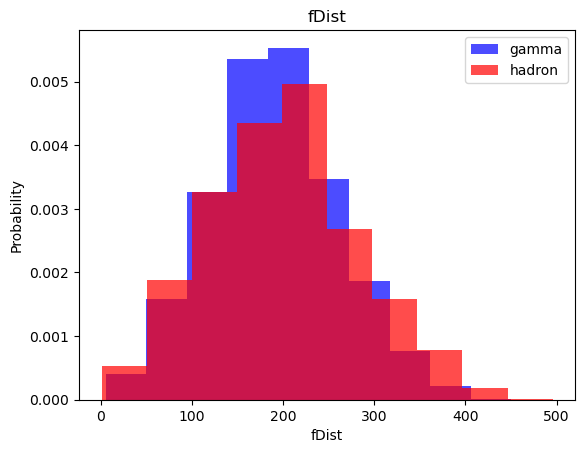

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [5]:
#Train, Validation, Test Datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/amith/miniconda3/envs/apidev_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
#Scaling the data
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)


    #Append the two arrays horizontally
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data,X,y

In [7]:
#Find out how many gammas and hadrons are there in the dataset
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))
"""
This is done so that you can determine how many data points are there of either value : gamma or hadron
As you can see from the output below, you have almost twice the amount of gamma to the hadron. This is when you implement something called oversampling
As the name suggests, you probably will take more samples from the second flavour over the first flavour
"""

7358
4054


'\nThis is done so that you can determine how many data points are there of either value : gamma or hadron\nAs you can see from the output below, you have almost twice the amount of gamma to the hadron. This is when you implement something called oversampling\nAs the name suggests, you probably will take more samples from the second flavour over the first flavour\n'

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [11]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14716
7358
7358


In [11]:
"""
Basically in the scale dataset function, we set the oversampler = true which led us to have the above result
Now, we can create the validation and the test datasets
"""

'\nBasically in the scale dataset function, we set the oversampler = true which led us to have the above result\nNow, we can create the validation and the test datasets\n'

In [12]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test)

## kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1353
           1       0.85      0.85      0.85      2451

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1301
           1       0.86      0.86      0.86      2503

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.82      0.81      0.82      3804



## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [21]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1301
           1       0.85      0.82      0.84      2503

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines or SVMs

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1301
           1       0.89      0.89      0.89      2503

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Nets

In [27]:
import tensorflow as tf

In [28]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross entropy')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
def plot_loss_and_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross entropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [29]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10, )),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

/home/amith/miniconda3/envs/apidev_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-18 22:03:10.362818: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [30]:
history = nn_model.fit(
    X_train, y_train, epochs = 100, batch_size=32, validation_split = 0.2
)

Epoch 1/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7290 - loss: 0.5509 - val_accuracy: 0.6440 - val_loss: 0.5990
Epoch 2/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8324 - loss: 0.3820 - val_accuracy: 0.6821 - val_loss: 0.5929
Epoch 3/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8463 - loss: 0.3606 - val_accuracy: 0.7296 - val_loss: 0.5324
Epoch 4/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8595 - loss: 0.3426 - val_accuracy: 0.7340 - val_loss: 0.5240
Epoch 5/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8622 - loss: 0.3344 - val_accuracy: 0.7422 - val_loss: 0.5231
Epoch 6/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8596 - loss: 0.3369 - val_accuracy: 0.7653 - val_loss: 0.4716
Epoch 7/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8633 - loss: 0.3291 - val_accuracy: 0.7371 - val_loss: 0.5039
Epoch 8/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8648 - loss: 0.3285 - val_accu

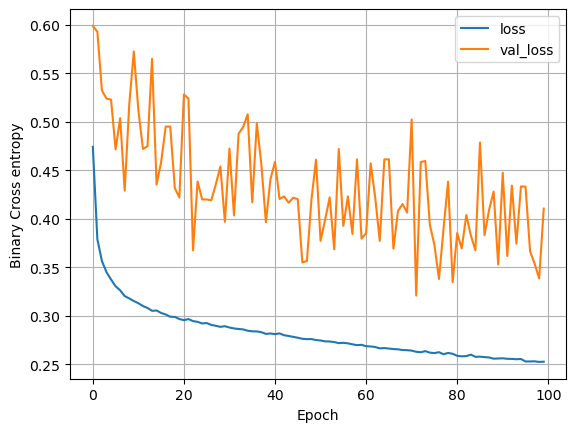

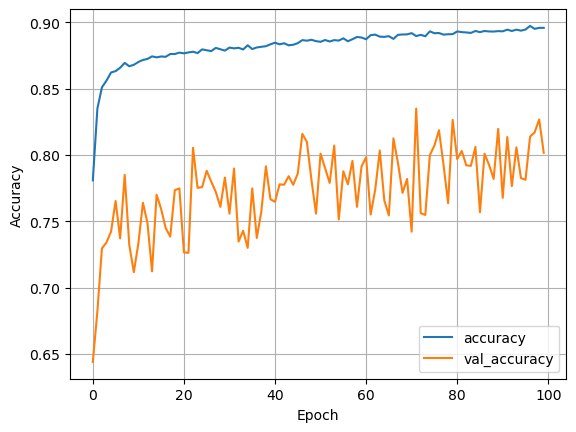

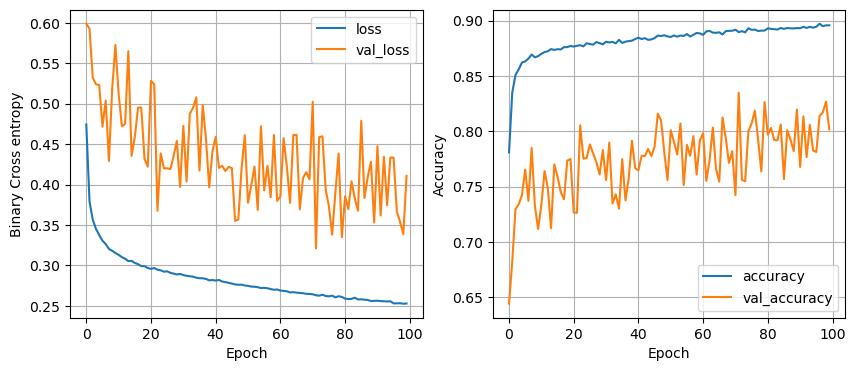

In [37]:
plot_loss(history)
plot_accuracy(history)
plot_loss_and_accuracy(history)

In [38]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1301
           1       0.88      0.92      0.90      2503

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

